### Data Visualization

#### `matplotlib` - from the documentation:
https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

`matplotlib.pyplot` is a collection of command style functions <br>
Each pyplot function makes some change to a figure <br>
`matplotlib.pyplot` preserves ststes across function calls


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

Call signatures::
```
    plot([x], y, [fmt], data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
```

Quick plot

The main usage of `plt` is the `plot()` and `show()` functions

https://matplotlib.org/3.1.1/api/pyplot_summary.html <br>
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html <br>
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html <br>
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html<br>
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html<br>
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html<br>
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html<br>


In [5]:
df_iris = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
colors = {'setosa':'red', 'versicolor':'orange', 'virginica':'blue'}
def get_col(spec):
    return colors[spec]
colors_col = df_iris.species.apply(get_col)
colors_col.head()


0    red
1    red
2    red
3    red
4    red
Name: species, dtype: object

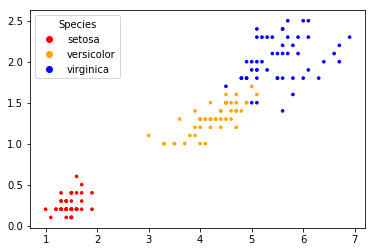

In [6]:
plt.scatter("petal_length","petal_width", data=df_iris, c = colors_col, s = 7, marker = "o")

legend_elements = [plt.Line2D([0], [0], marker='o', linestyle="", color=colors["setosa"], label="setosa"),
                   plt.Line2D([0], [0], marker='o', linestyle="", color=colors["versicolor"], label="versicolor"),
                   plt.Line2D([0], [0], marker='o', linestyle="", color=colors["virginica"], label="virginica")]

plt.legend(handles=legend_elements,loc="upper left", title="Species")
plt.show()

https://python-graph-gallery.com/matplotlib/

#### Using pandas `.plot()`

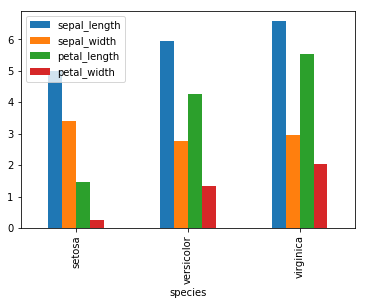

In [7]:
df_iris.groupby("species").mean().plot(kind='bar')
plt.show()

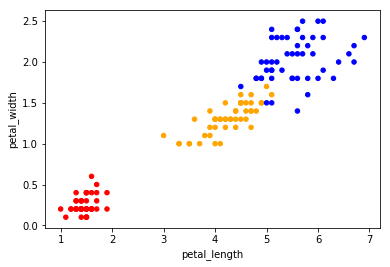

In [8]:
df_iris.plot(x= "petal_length", y = "petal_width" ,kind = "scatter", color = colors_col)
plt.savefig('output1.png')

https://github.com/pandas-dev/pandas/blob/v0.25.0/pandas/plotting/_core.py#L504-L1533

https://python-graph-gallery.com/wp-content/uploads/Matplotlib_cheatsheet_datacamp.png

<img src = "https://python-graph-gallery.com/wp-content/uploads/Matplotlib_cheatsheet_datacamp.png" width = "1000"/>

### `seaborn` - dataset-oriented plotting

Seaborn is a library that specializes in making *prettier* `matplotlib` plots of statistical data. <br>
It is built on top of matplotlib and closely integrated with pandas data structures.

https://seaborn.pydata.org/introduction.html<br>
https://python-graph-gallery.com/seaborn/

In [10]:
import seaborn as sns

`seaborn` lets users *style* their plotting environment.<br>
There are 5 preset themes: darkgrid (default), whitegrid, dark, white, and ticks.<br>
https://seaborn.pydata.org/tutorial/aesthetics.html

However, you can always use `matplotlib`'s `plt.style`
https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

In [11]:
sns.set(style='whitegrid')

In [14]:
#dir(sns)

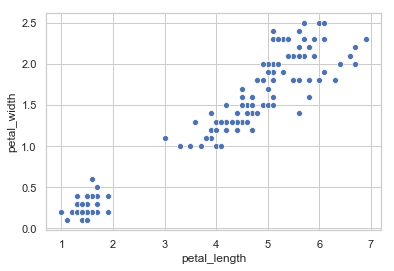

In [12]:
sns.scatterplot(x='petal_length',y='petal_width',data=df_iris)
plt.show()

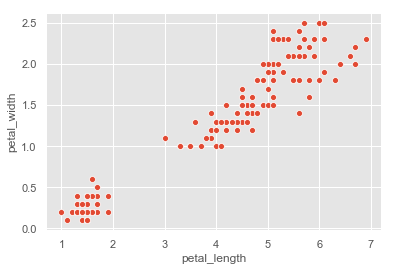

In [15]:
with plt.style.context(('ggplot')):
    sns.scatterplot(x='petal_length',y='petal_width',data=df_iris)
plt.show()

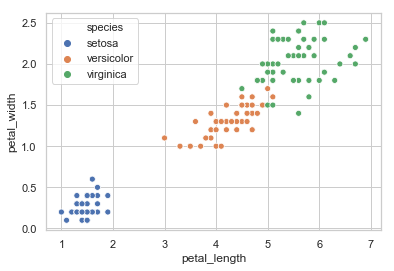

In [16]:
sns.scatterplot(x='petal_length',y='petal_width', hue = "species",data=df_iris)
plt.show()

#### Violin plot

Fancier box plot that gets rid of the need for 'jitter' to show the inherent distribution of the data points

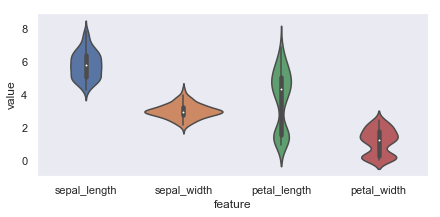

In [17]:
sns.set(style="dark")
fig, axes = plt.subplots(figsize=(7, 3))
sns.violinplot(data=df_iris, ax=axes)
axes.set_ylabel('value')
axes.set_xlabel('feature')
plt.show()

#### Distplot

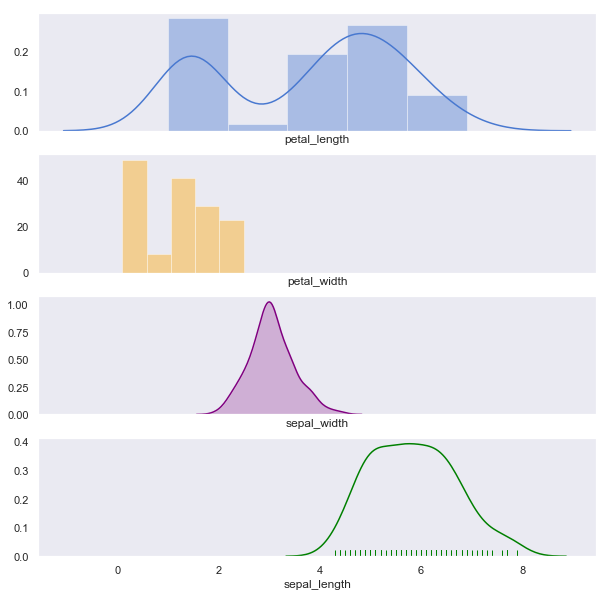

In [18]:
sns.set(style='dark', palette='muted')

# 1 column, 4 rows
f, axes = plt.subplots(4,1, figsize=(10,10), sharex=True)

# Regular displot
sns.distplot(df_iris.petal_length, ax=axes[0])

# Change the color
sns.distplot(df_iris.petal_width, kde=False, ax=axes[1], color='orange')

# Show the Kernel density estimate
sns.distplot(df_iris.sepal_width, hist=False, kde_kws={'shade':True}, ax=axes[2], color='purple')

# Show the rug
sns.distplot(df_iris.sepal_length, hist=False, rug=True, ax=axes[3], color='green')
plt.show()

#### FacetGrid

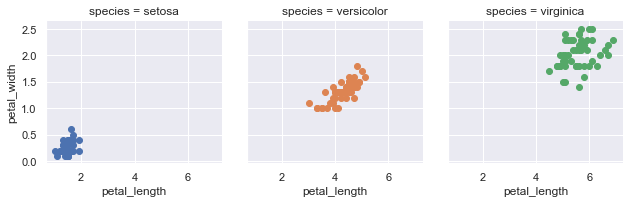

In [19]:
sns.set()
columns = ['species', 'petal_length', 'petal_width']
facet_column = 'species'
g = sns.FacetGrid(df_iris.loc[:,columns], col=facet_column, hue=facet_column)
g.map(plt.scatter, 'petal_length', 'petal_width')

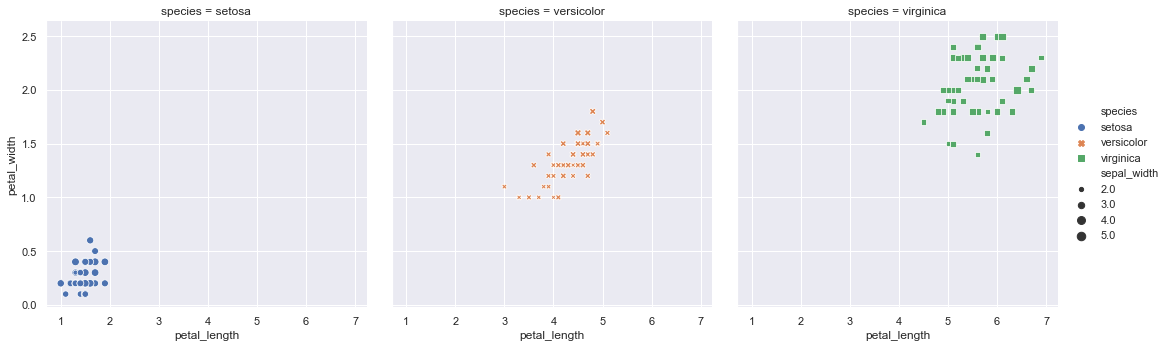

In [20]:
sns.relplot(x="petal_length", y="petal_width", col="species",
            hue="species", style="species", size="sepal_width",
            data=df_iris)
plt.show()

https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

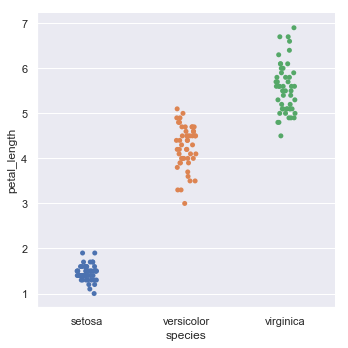

In [21]:
sns.catplot(x="species", y="petal_length", data=df_iris)
plt.show()

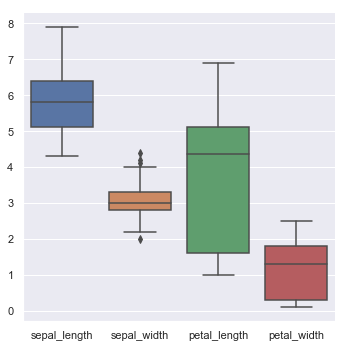

In [22]:
sns.catplot(kind="box", data=df_iris)
plt.show()

In [23]:
# https://seaborn.pydata.org/tutorial/categorical.html
tips = sns.load_dataset("tips")
print(tips.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Plot the tips by day with two side by side box plots for males and females and different subplots for the time of the meal (lunch/dinner). 




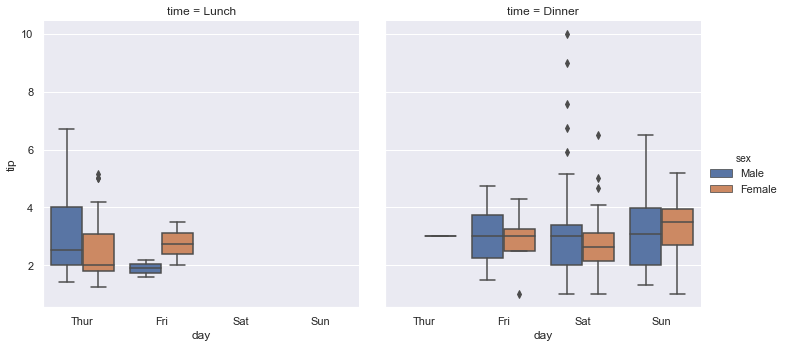

In [28]:
sns.catplot(x="day", y="tip", kind="box", hue = "sex", data=tips, col = "time")
plt.show()

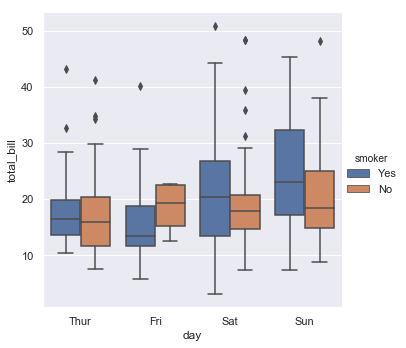

In [24]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)
plt.show()

In [ ]:
# help(sns.catplot)

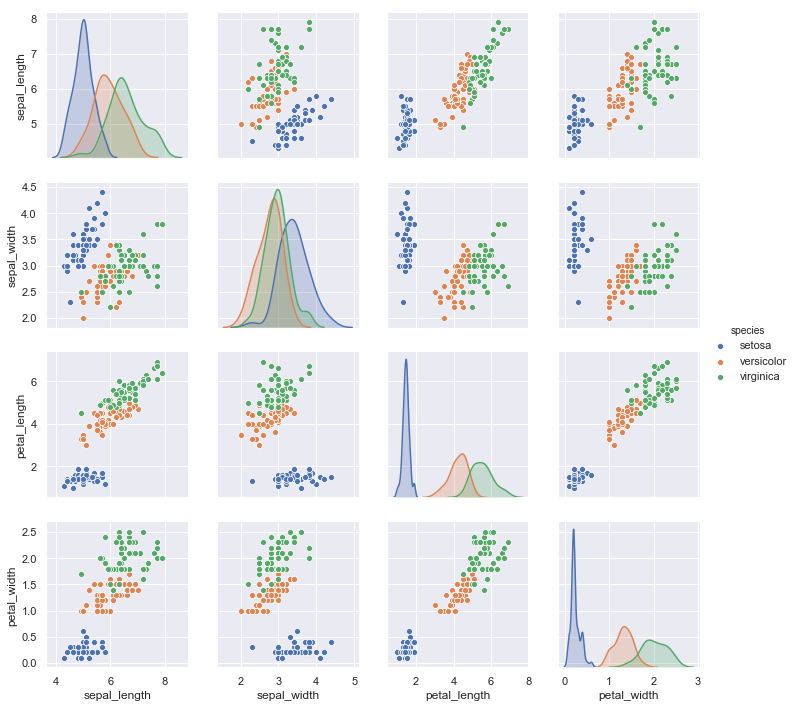

In [25]:
sns.pairplot(df_iris, hue='species', height=2.5);


https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

<img src = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf" width = "1000"/>

### `plotnine` - R ggplot2 in python

plotnine is an implementation of a grammar of graphics in Python, it is based on ggplot2. The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot.

Plotting with a grammar is powerful, it makes custom (and otherwise complex) plots are easy to think about and then create, while the simple plots remain simple.



In [ ]:
#!pip install plotnine

In [ ]:
#!conda install -c conda-forge plotnine

https://plotnine.readthedocs.io/en/stable/

In [29]:
from plotnine import *


In [31]:
#dir()

https://plotnine.readthedocs.io/en/stable/api.html

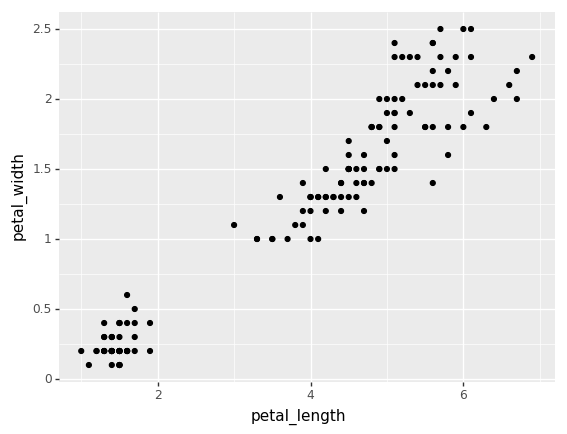

<ggplot: (-9223372029310046099)>

In [35]:
p = ggplot(data=df_iris) + aes(x="petal_length", y = "petal_width") + geom_point()
p

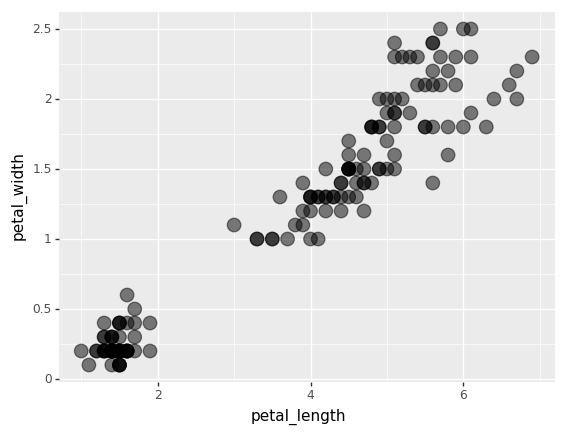

<ggplot: (7544729748)>

In [36]:
# add transparency - to address overlapping points
ggplot(data=df_iris) + aes(x="petal_length", y = "petal_width") + geom_point(size = 5, alpha=0.5)

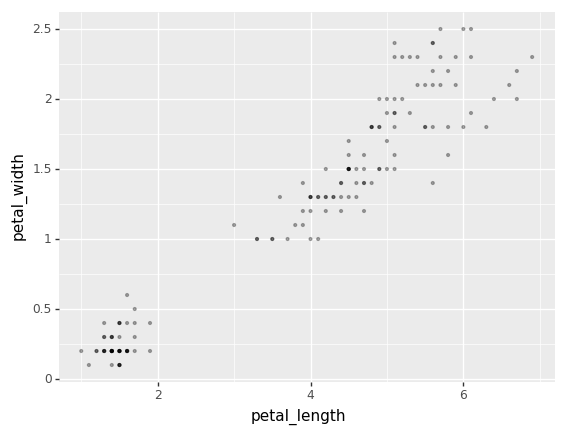

<ggplot: (-9223372029309157979)>

In [38]:
# change point size 
ggplot(data=df_iris) + aes(x="petal_length", y = "petal_width") + geom_point(size = 0.7, alpha=0.3)

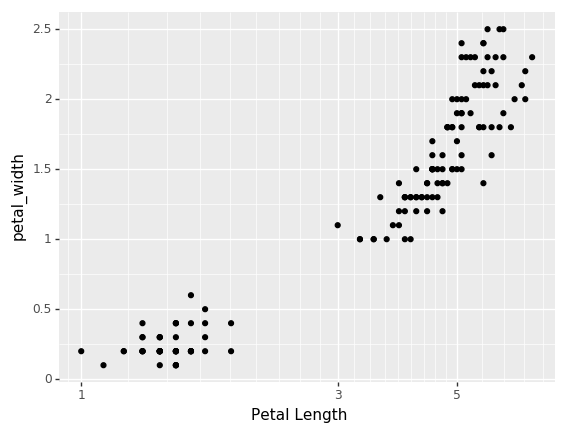

<ggplot: (-9223372029309053980)>

In [39]:
# more parameters 
ggplot(data=df_iris) + aes(x="petal_length", y = "petal_width") + geom_point() + scale_x_log10() + xlab("Petal Length")

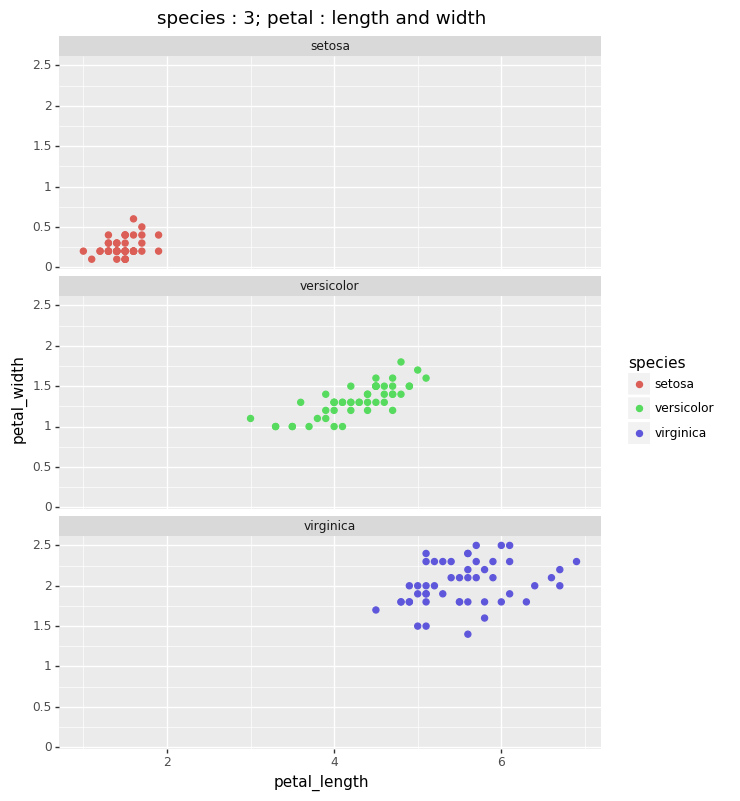

<ggplot: (7544739006)>

In [43]:
n = "3"
features = "length and width"
title = f'species : {n}; petal : {features}'
#title = 'species : {}; petal : {}'.format(n,features)


ggplot(data=df_iris) +aes(x='petal_length',y='petal_width',color="species") \
    + geom_point(size=2) + facet_wrap('~species',nrow=3) \
    + theme(figure_size=(7,9)) + ggtitle(title)


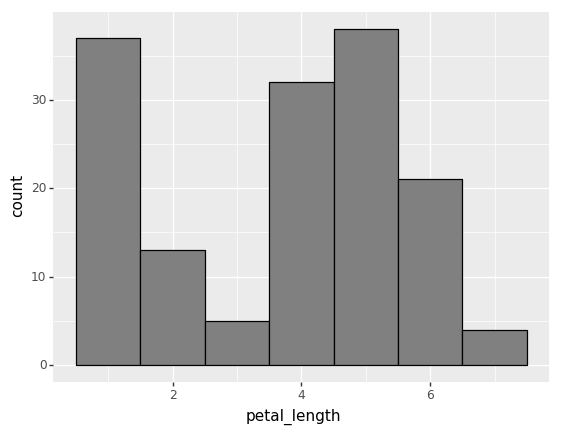

<ggplot: (-9223372029310440332)>

In [44]:
p = ggplot(data=df_iris) + aes(x='petal_length') \
    + geom_histogram(binwidth=1,color='black',fill='grey')
p

In [45]:
ggsave(plot=p, filename='hist_plot_with_plotnine.png')

/Users/mitrea/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/mitrea/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: hist_plot_with_plotnine.png
  warn('Filename: {}'.format(filename))


In [ ]:
tips = sns.load_dataset("tips")
print(tips.head())

ggplot(aes(x="day", y="tip",\
           color="smoker"), data=tips) \
            + geom_boxplot()\
            + geom_jitter(width=0.05, alpha=0.4) \
            + facet_grid(".~smoker")





http://cmdlinetips.com/2018/05/plotnine-a-python-library-to-use-ggplot2-in-python/ <br>
https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

<img src = "https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf" width = "1000"/>

Use ggplot to plot the sepal_length in boxplots separated by species, add new axes labels and make the y axis values log10.

* Write a function that takes as a parameter a line of the dataframe and if the species is 
** setosa it returns the petal_length
** versicolor it returns the petal_width
** virginica it returns the sepal_length

Apply this function to every line in the dataset. <br>
Use ggplot to make a histogram of the resulted values.

In [ ]:
#dir()

https://plotnine.readthedocs.io/en/stable/api.html

Look for scale functions.

In [77]:
def get_info(line):
    if line["species"] == "setosa":
        return line["petal_length"]
    elif line["species"] == "versicolor":
        return line["petal_width"]
    elif line["species"] == "virginica":
        return line["sepal_length"]
    else:
        print("Wrong species")
        return None

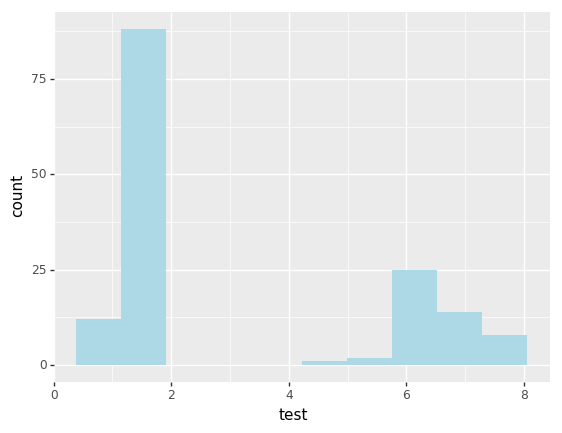

<ggplot: (7544837682)>

In [87]:
res = df_iris.apply(get_info, axis = 1)
df = pd.DataFrame(res, columns = ["test"])

ggplot(data=df) + aes(x="test") + geom_histogram(bins=10, fill = "lightblue")



More resources: 

https://github.com/swyder/plotnine_tutorial/blob/master/plotnine_demo_sw.ipynb <br>
https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/